In [86]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, ZeroPadding2D
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as pyplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter
from urllib import request

In [87]:
# PROBLEM 1
# Model from the assignment
model = models.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Show the summary
model.summary()

Model: &quot;sequential_31&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [88]:
# In the summary above, we see three columns: the Layer (type), the Output Shape, and the Param #. In order to calculate the final column, we will also need the number of filters and the kernel size, which we will pull directly from the code for the model above. Generally speaking, in neural network architecture the formula for learnable params is: (inputs * ouputs) + biases. For CNNs, the inputs are the number of filters of the previous layer (if prev layer is dense, it is the number of nodes), the outputs are the number of filters in the current layer * size of those filters, and the bias is the number of filters in the current layer.

# So, in the model summary above, the Param # for each layer is as follows:
# 1. (32 * 9) + 32 = 320
# 2. 0 because max pooling is functional and has no learnable params
# 3. (32 * 64 * 9) + 64 = 18496
# 4. 0 because max pooling is functional and has no learnable params
# 5. (64 * 64 * 9) + 64 = 36928

In [89]:
# Import data from mnist using code from assignment
# Split into train images/labels and test images/labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape train/test images to include an explicit channel
# Convert train/test images to float32 type for use in CNN
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Convert to categorical using keras utility function
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [90]:
# PROBLEM 2
# Define model with maxpooling layers, based on code from assignment
# Add maxpooling layer after each conv2d layers

# Define number of epochs and make range of epochs for use throughout the assignment
num_epochs = 5
epochs = range(1, num_epochs + 1)

max_model = models.Sequential([
    Conv2D( 32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
# Compile and fit model according to assignment instructions, retaining history for later recall
max_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
max_history = max_model.fit(train_images, train_labels, epochs=num_epochs, batch_size=64)

Epoch 1/5
938/938 [==============================] - 18s 19ms/step - loss: 0.1673 - accuracy: 0.9479
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0450 - accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 18s 20ms/step - loss: 0.0316 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0245 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0187 - accuracy: 0.9945


In [91]:
# Define model with average pooling, based on code from assignment
# Add avgpooling layer after each conv2d layers
avg_model = models.Sequential([
    Conv2D( 32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    AveragePooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    AveragePooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
# Compile and fit model according to assignment instructions, retaining history for later recall
avg_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
avg_history = avg_model.fit(train_images, train_labels, epochs=num_epochs, batch_size=64)

Epoch 1/5
938/938 [==============================] - 17s 18ms/step - loss: 0.2105 - accuracy: 0.9359
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0564 - accuracy: 0.9828
Epoch 3/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0391 - accuracy: 0.9878
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0299 - accuracy: 0.9907
Epoch 5/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0251 - accuracy: 0.9924


&lt;matplotlib.legend.Legend at 0x152324af0&gt;

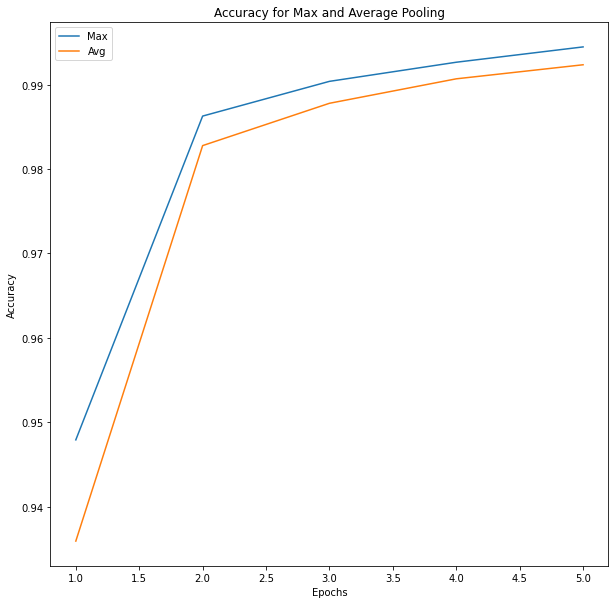

In [92]:
# Get accuracy from max and avg models from their respective history data
max_accuracy = max_history.history['accuracy']
avg_accuracy = avg_history.history['accuracy']
# Plot max and average accuracy against number of epochs using matplotlib
plt.plot(epochs, max_accuracy, label='Max')
plt.plot(epochs, avg_accuracy, label='Avg')
# Add title, labels, and legend
plt.title('Accuracy for Max and Average Pooling')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [104]:
# The plot above shows that the maxpooling model achieves a higher overall accuracy and has a higher increase at each epoch number
# This is understandable. In Hands-on Machine Learning on page 459, the author points out "people mostly use max pooling layers now, as they generally perform better."

In [94]:
# PROBLEM 3
# Define results dict for storing accuracy values
results_max = {}
# Define all filer sizes for use in loop
filter_sizes = [ 
    ('3x3',(3,3)),
    ('4x4',(4,4)),
    ('5x5',(5,5)),
    ('6x6',(6,6))
]
# Loop through all filtersizes and train a model with maxpooling layers
for filter_name, filter_size in filter_sizes:
    model = models.Sequential([
        Conv2D( 32, filter_size, activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    # Compile and fit model according to assignment instructions, retaining history for later recall
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=num_epochs, batch_size=64)
    # Get accuracy from history and add to results dict
    accuracy = history.history['accuracy']
    results_max[filter_name] = accuracy

Epoch 1/5
938/938 [==============================] - 19s 20ms/step - loss: 0.1657 - accuracy: 0.9478
Epoch 2/5
938/938 [==============================] - 18s 20ms/step - loss: 0.0455 - accuracy: 0.9860
Epoch 3/5
938/938 [==============================] - 19s 21ms/step - loss: 0.0327 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0255 - accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 19s 21ms/step - loss: 0.0198 - accuracy: 0.9941
Epoch 1/5
938/938 [==============================] - 17s 18ms/step - loss: 0.1693 - accuracy: 0.9470
Epoch 2/5
938/938 [==============================] - 17s 19ms/step - loss: 0.0456 - accuracy: 0.9856
Epoch 3/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0324 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0251 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0200 - accurac

&lt;matplotlib.legend.Legend at 0x1522999a0&gt;

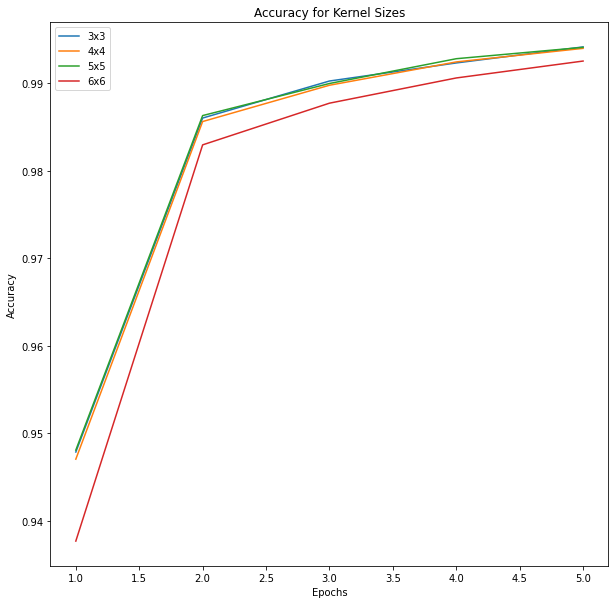

In [95]:
# Clear previous plot
plt.clf()
# Increase size of plot for clarity
plt.rcParams["figure.figsize"] = (10,10)
# Each key-value pair in the results dict is the name of the kernel size and a list of accuracy values at each epoch, respectively.
for key, val in results_max.items():
    # Plot accuracy against number of epochs
    plt.plot(epochs, val, label=key)
# Add title, labels, and legend
plt.title('Accuracy for Kernel Sizes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [96]:
# This plot shows that the model with the 3x3 kernel trains a bit slower, but ultimately has the highest accuracy
# The model with the 5x5 kernel learns the fastest but is the second worst.
# The model with the 4x4 kernel appears to be converging with the 3x3 at epoch 7, which is not shown here, as I'm keeping the number of epochs consistent for use later. But I did this calculation previously.

In [97]:
# PROBLEM 4
# Define results dict for storing accuracy values
results_padding = {}
# Define model with zero padding layer before each conv2d layer
padding_model = models.Sequential([
    ZeroPadding2D(padding=(3,3)),
    Conv2D( 32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    ZeroPadding2D(padding=(3,3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    ZeroPadding2D(padding=(3,3)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
# Compile and fit model according to assignment instructions, retaining history for later recall
padding_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
padding_model_history = padding_model.fit(train_images, train_labels, epochs=num_epochs, batch_size=64)
# Get accuracy and add to results dict
accuracy = padding_model_history.history['accuracy']
results_padding['padding'] = accuracy

Epoch 1/5
938/938 [==============================] - 80s 85ms/step - loss: 0.1439 - accuracy: 0.9546
Epoch 2/5
938/938 [==============================] - 79s 84ms/step - loss: 0.0417 - accuracy: 0.9866
Epoch 3/5
938/938 [==============================] - 78s 84ms/step - loss: 0.0284 - accuracy: 0.9915
Epoch 4/5
938/938 [==============================] - 79s 84ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 80s 85ms/step - loss: 0.0171 - accuracy: 0.9948


In [98]:
# Define model without padding layers added
no_padding_model = models.Sequential([
    Conv2D( 32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
# Compile and fit model according to assignment instructions, retaining history for later recall
no_padding_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
no_padding_model_history = no_padding_model.fit(train_images, train_labels, epochs=num_epochs, batch_size=64)
# Get accuracy and add to results dict
accuracy = no_padding_model_history.history['accuracy']
results_padding['no_padding'] = accuracy

Epoch 1/5
938/938 [==============================] - 19s 21ms/step - loss: 0.1598 - accuracy: 0.9504
Epoch 2/5
938/938 [==============================] - 19s 21ms/step - loss: 0.0450 - accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0322 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 19s 21ms/step - loss: 0.0243 - accuracy: 0.9928
Epoch 5/5
938/938 [==============================] - 19s 21ms/step - loss: 0.0203 - accuracy: 0.9937


In [99]:
# Add accuracy of max model in problem 2
results_padding['original'] = max_accuracy

range(1, 6)


&lt;matplotlib.legend.Legend at 0x1520f24f0&gt;

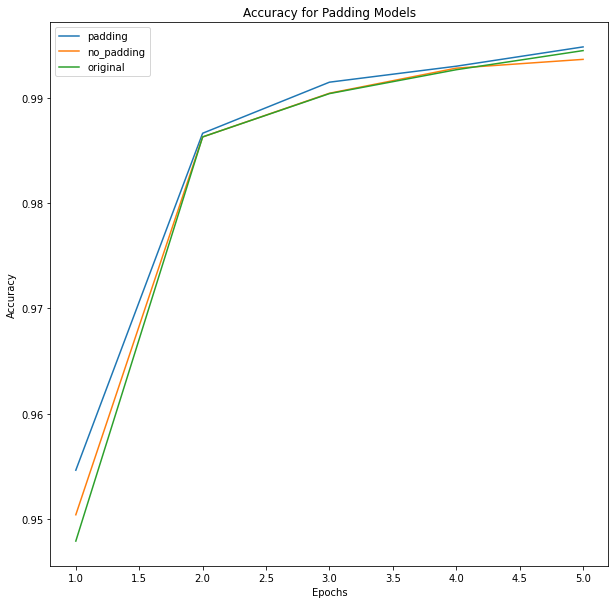

In [100]:
# Clear plot
plt.clf()
# Increase size of plot for clarity
plt.rcParams["figure.figsize"] = (10,10)
# Loop through padding results dict
# Each item is the key (name) and value (list of accuracy values)
for key, val in results_padding.items():
    # Plot accuracy against number of epochs
    plt.plot(epochs, val, label=key)
# Add title, labels, and legend
plt.title('Accuracy for Padding Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [101]:
# This plot shows that the model with padding achieves higher accuracy overall and with less training. The second best is the original and not padding is the worst in the end, though that one trains a little faster.

In [102]:
# PROBLEM 5
# Define url for cat picture
url = 'https://cdn.cnn.com/cnnnext/dam/assets/200713171600-02-silk-road-cats-exlarge-169.jpg'
# Get image at url using request module and open using PIL
img = Image.open(request.urlopen(url))
# Define size, kernel, scale, and offset of image
size = (3,3)
kernel = (-1, -1, -1, -1, 8, -1, -1, -1, -1)
scale = 1
offset = 0
# Define laplace filter, using PIL ImageFilter
laplace_filter = ImageFilter.Kernel(size=size, kernel=kernel, scale=scale, offset=offset)
# Make img with edges detected using laplace filter
img_edge = img.filter(laplace_filter)

&lt;Figure size 720x720 with 0 Axes&gt;

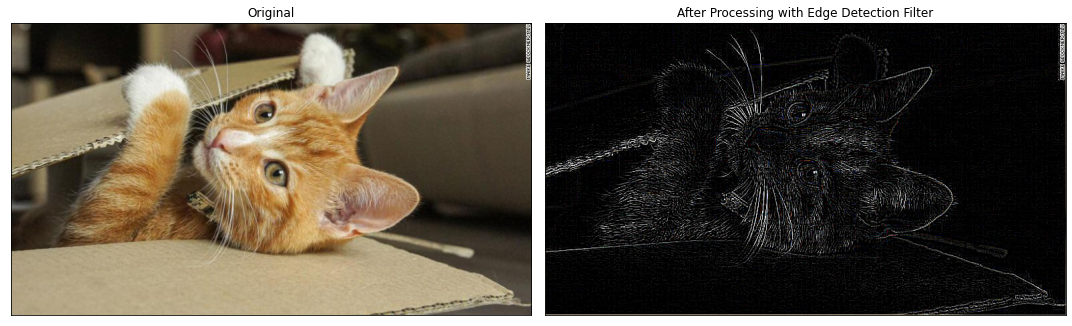

In [103]:
# Clear plot
plt.clf()
# Use subplots to get plots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
# Show first image
ax1.imshow(img)
# Remove ticks and set title
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original')

# Show second image
ax2.imshow(img_edge)
# Remove ticks and set title
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('After Processing with Edge Detection Filter')
fig.tight_layout()

In [3]:
from tensorflow import keras
import numpy as np
def get_model():
    # Create a simple model.
    inputs = keras.Input(shape=(32,))
    outputs = keras.layers.Dense(1)(inputs)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

model = get_model()

# Train the model.
test_input = np.random.random((128, 32))
test_target = np.random.random((128, 1))
model.fit(test_input, test_target)

# Save the model
model.save('test_save_model_tf', save_format='tf')

4/4 [==============================] - 0s 554us/step - loss: 1.1999
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: test_save_model_tf/assets
